In [240]:
%%capture
pip install geopandas

In [241]:
%%capture
pip install libpysal

In [242]:
%%capture
pip install pysal

In [243]:
%%capture
pip install giddy

In [244]:
%%capture
pip install esda

**Start by reading in sample file and drafting a program to compile and clean data**

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import geopandas as gpd
import pysal
import libpysal
import pysal.explore as explore
import seaborn as sns
from libpysal.weights import Queen, Rook, KNN
from libpysal.weights import lat2W
import giddy
import esda

**California sample records 1980-2021**


In [246]:
ca = pd.read_csv(r"/content/drive/MyDrive/Master_defense_investment_data/California_contracts.csv")

In [247]:
ca_zip = gpd.read_file(r'/content/drive/MyDrive/Spatiotemp/final project/ca shapefiles/ca_zip.shp')

In [248]:
ca_shp = gpd.read_file(r'/content/drive/MyDrive/Spatiotemp/stars data/california.shp')

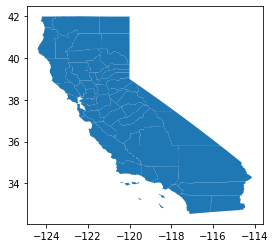

In [275]:
ca_shp.plot()

In [249]:
ca['Date Signed'].astype(str)

0         Feb 5, 2001
1         Mar 7, 2002
2        Jun 30, 2000
3         Apr 3, 2002
4        Jun 25, 2002
             ...     
29995     Apr 7, 2020
29996    Sep 22, 2020
29997    Mar 15, 2021
29998     Jun 4, 2015
29999    Jul 11, 2016
Name: Date Signed, Length: 30000, dtype: object

In [250]:
year = []
for i in ca['Date Signed']:
  year.append(i[7:])

for i in year:
  str(i)
  i.strip()

In [251]:
%%capture
year

In [252]:
ca['Year'] = year

In [253]:
ca['Year'] = ca['Year'].str.strip()

In [254]:
ca['ZIP'] = ca['Entity ZIP Code'].str[:5]

Join investment data to zip shapefile.

In [255]:
ca_zip['ZIP'] = ca_zip['zcta']

In [256]:
ca_spatial = ca_zip.merge(ca, on='ZIP')

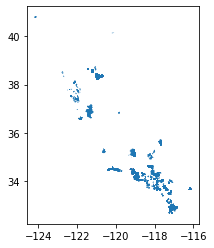

In [276]:
ca_spatial.plot()

In [257]:
#list(ca_spatial)
#ca_spatial.drop(['age_under5','age_5to9','age_10to14','age_15to19','age_20to24','age_25to29','age_30to34','age_35to39','age_40to44','age_45to49','age_50to54','age_55to59','age_60to64','age_65to69','age_70to74','age_75to79','age_80to84','age_85_ove','age16_over','age18_over','age21_over','age62_over','age65_over','male','female'], axis=0, inplace=False)

Condense records by summing investment per zip.

In [258]:
ca_spatial['Action Obligation ($)'] = ca_spatial['Action Obligation ($)'].str.replace(',', '').str.replace('$', '')

In [259]:
ca_spatial['Action Obligation ($)']= ca_spatial['Action Obligation ($)'].astype(float)

In [260]:
ca_spatial['Action Obligation ($)'].astype(int)

0          3769
1         76000
2        157000
3             0
4             0
          ...  
29787      2750
29788     20000
29789      4260
29790     25785
29791     71046
Name: Action Obligation ($), Length: 29792, dtype: int64

In [261]:
ca_sum = ca_spatial.groupby(['Year', 'ZIP'],as_index=False)['Action Obligation ($)'].sum()

In [262]:
pd.DataFrame(ca_sum)

,Year,ZIP,Action Obligation ($)
0,1980,92122,138000.00
1,1981,92122,1420000.00
2,1982,92122,1324000.00
3,1983,92122,2282000.00
4,1983,92704,1799000.00
...,...,...,...
874,2021,94043,325491.95
875,2021,94520,0.00
876,2021,95642,397314.75
877,2021,95742,6285539.20


In [263]:
ca = ca_zip.merge(ca_sum, on='ZIP', validate = '1:m')

In [264]:
%%capture
ca.head()

In [41]:
ca.shape

(879, 89)

**Exploratory Spatial Data Analysis**
Using the now-clean files,

In [266]:
w_queen = Queen.from_dataframe(ca)

In [27]:
# ca_plot = gpd.GeoDataFrame(ca)

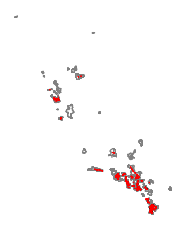

In [278]:
#plot queen lattice to check work
ax = ca_spatial.plot(edgecolor='grey', facecolor='w')
ca,ax = w_queen.plot(ca,ax=ax, 
        edge_kws= dict(color='r', linestyle=':', linewidth=1),
        node_kws = dict(marker=''))
ax.set_axis_off()

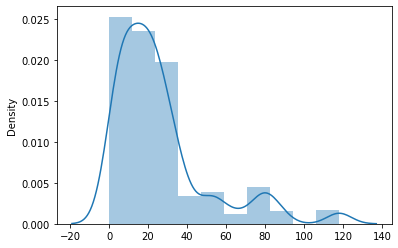

In [43]:
queen_card = pd.Series(w_queen.cardinalities)
sns.distplot(queen_card, bins=10)

In [44]:
year = [2010, 1995, 1996, 2015, 2016, 2017, 2018, 2019,2020, 2021, 2007, 2009, 2006, 1989, 1990, 1991,1992, 1993, 1994, 1997, 1998, 1999, 2000, 2001,2002, 2003, 2004, 2005, 2008, 2011, 2012, 2013,2014, 1985, 1986, 1987, 1988, 1984, 1980, 1981,1982, 1983]

In [45]:
for i in year:
  int(i)

In [144]:
ca_time = gpd.GeoDataFrame(ca[['Year', 'ZIP','Action Obligation ($)']]).dropna()

In [145]:
ca_time.head()

,Year,ZIP,Action Obligation ($)
0,2010,93311,3769.50
1,1995,91504,233000.00
2,1996,91504,184000.00
3,2015,91789,1951015.43
4,2016,91789,7919059.97


In [151]:
ca_prep = ca_time.pivot(index='ZIP', columns=['Year'], values='Action Obligation ($)').fillna(0)
# ca_time.fillna(0)

In [104]:
ca_time.shape

(879, 3)

In [153]:
pd.DataFrame(ca_prep)

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
ZIP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,72484.05,72878.34,9.153361e+04,42877.80
90024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61492.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.000000e+00,0.00
90025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,21900.00,0.00,0.00,0.0,0.00,0.00,0.00,0.000000e+00,0.00
90032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,10531.06,0.00,0.00,0.000000e+00,0.00
90045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,193707.0,0.0,26590.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.000000e+00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1088137.14,8.615700e+05,397314.75
95742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,6047538.80,9.671125e+06,6285539.20
95762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,374000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.000000e+00,0.00


In [60]:
ca_zip.head()

,objectid,cnty_fips,county,tract,tract_id,census_key,zcta,zcta_key,latitude,longitude,tot_pop,age_under5,age_5to9,age_10to14,age_15to19,age_20to24,age_25to29,age_30to34,age_35to39,age_40to44,age_45to49,age_50to54,age_55to59,age_60to64,age_65to69,age_70to74,age_75to79,age_80to84,age_85_ove,age16_over,age18_over,age21_over,age62_over,age65_over,male,female,age_median,age_medi_1,age_medi_2,one_race,...,hispanic_l,non_hisp_l,white_nhl,black_af_1,amind_al_1,asian_nhl,nathaw_i_1,other_nhl,multi_ra_1,tot_in_hou,tot_in_gc,gc_inst,gc_noninst,gc_correct,gc_juv,gc_nurs,gc_other,hh_total,hh_family,hh_nonfaml,hh_nonfami,hh_nonfa_1,hh_nonfa_2,hh_nonfa_3,hh_nonfa_4,hh_with_un,hh_with_65,hu_total,hu_occ,hu_vac,hu_vac_ren,hu_vac_sea,hu_occ_own,hu_occ_o_1,hu_occ_ren,hu_occ_r_1,shape_area,shape_len,geometry,ZIP
0,1.0,None,None,None,None,None,94601,0694601,37.776711,-122.218378,50294.0,4205.0,3771.0,3457.0,3698.0,4343.0,4720.0,4537.0,3940.0,3369.0,3016.0,2843.0,2473.0,1930.0,1199.0,931.0,706.0,531.0,625.0,38163.0,36694.0,34348.0,5017.0,3992.0,25820.0,24474.0,30.9,30.4,31.7,47732.0,...,27039.0,23255.0,3933.0,8833.0,246.0,8842.0,336.0,104.0,961.0,49455.0,839.0,439.0,400.0,47.0,21.0,371.0,0.0,14826.0,10411.0,4415.0,3146.0,1529.0,327.0,1617.0,581.0,6650.0,2928.0,16362.0,14826.0,1536.0,839.0,28.0,4764.0,16528.0,10062.0,32927.0,8.721649e+06,15265.093880,"POLYGON ((-122.22717 37.79197, -122.22693 37.7...",94601
1,2.0,None,None,None,None,None,94501,0694501,37.774084,-122.278049,60212.0,3493.0,3358.0,3187.0,3358.0,3453.0,4222.0,4238.0,4823.0,4830.0,4835.0,4560.0,4266.0,3740.0,2302.0,1648.0,1344.0,1193.0,1362.0,49477.0,48067.0,46181.0,9943.0,7849.0,28814.0,31398.0,40.0,38.6,41.0,55791.0,...,7175.0,53037.0,27809.0,4124.0,231.0,16976.0,316.0,231.0,3350.0,58728.0,1484.0,629.0,855.0,0.0,0.0,629.0,0.0,25025.0,14481.0,10544.0,8291.0,3499.0,698.0,4792.0,1633.0,7299.0,5700.0,27087.0,25025.0,2062.0,885.0,189.0,10286.0,26023.0,14739.0,32705.0,2.954478e+07,27119.154912,"POLYGON ((-122.29181 37.76301, -122.30661 37.7...",94501
2,3.0,None,None,None,None,None,94560,0694560,37.520360,-122.031000,42573.0,3142.0,2929.0,2860.0,2951.0,2741.0,3128.0,3249.0,3208.0,3112.0,3243.0,3030.0,2469.0,1985.0,1477.0,1206.0,866.0,571.0,406.0,33041.0,31774.0,30154.0,5652.0,4526.0,21217.0,21356.0,35.4,34.4,36.5,39774.0,...,14994.0,27579.0,11726.0,1908.0,95.0,11404.0,601.0,101.0,1744.0,42428.0,145.0,0.0,145.0,0.0,0.0,0.0,0.0,12972.0,10334.0,2638.0,1942.0,834.0,182.0,1108.0,523.0,5643.0,3282.0,13414.0,12972.0,442.0,170.0,17.0,8942.0,28489.0,4030.0,13939.0,3.581839e+07,30752.336176,"POLYGON ((-122.05499 37.54960, -122.05441 37.5...",94560
3,4.0,None,None,None,None,None,94587,0694587,37.603151,-122.018626,69516.0,4746.0,4534.0,4554.0,4854.0,4612.0,5048.0,5124.0,5093.0,5095.0,4979.0,4906.0,4435.0,3826.0,2505.0,1902.0,1301.0,985.0,1017.0,54649.0,52669.0,49933.0,9900.0,7710.0,34318.0,35198.0,36.2,34.9,37.5,64879.0,...,15895.0,53621.0,10009.0,4194.0,116.0,35052.0,839.0,138.0,3273.0,68998.0,518.0,96.0,422.0,0.0,14.0,75.0,7.0,20433.0,16677.0,3756.0,2740.0,1171.0,273.0,1569.0,729.0,9066.0,5488.0,21258.0,20433.0,825.0,384.0,39.0,13580.0,46272.0,6853.0,22726.0,5.107510e+07,53110.314427,"POLYGON ((-122.06515 37.60485, -122.06499 37.6...",94587
4,5.0,None,None,None,None,None,94580,0694580,37.676958,-122.133606,27152.0,1671.0,1722.0,1932.0,2128.0,1750.0,1748.0,1783.0,1879.0,2007.0,2086.0,2095.0,1783.0,1333.0,847.0,693.0,580.0,568.0,547.0,21421.0,20553.0,19313.0,3939.0,3235.0,13261.0,13891.0,37.3,35.9,38.5,25440.0,...,9782.0,17370.0,8114.0,1613.0,90.0,6457.0,203.0,67.0,826.0,27012.0,140.0,0.0,140.0,0.0,0.0,0.0,0.0,8624.0,6634.0,1990.0,1560.0,607.0,197.0,953.0,495.0,3482.0,2414.0,8958.0,8624.0,334.0,116.0,15.0,6105.0,18760.0,2519.0,8252.0,8.946896e+06,20260.685185,"POLYGON ((-122.12999 37.68445, -122.12995 37.6...",94580


In [154]:
ca_new = ca_zip.merge(ca_prep, on='ZIP', validate = '1:m')

In [155]:
ca_new.head()

,objectid,cnty_fips,county,tract,tract_id,census_key,zcta,zcta_key,latitude,longitude,tot_pop,age_under5,age_5to9,age_10to14,age_15to19,age_20to24,age_25to29,age_30to34,age_35to39,age_40to44,age_45to49,age_50to54,age_55to59,age_60to64,age_65to69,age_70to74,age_75to79,age_80to84,age_85_ove,age16_over,age18_over,age21_over,age62_over,age65_over,male,female,age_median,age_medi_1,age_medi_2,one_race,...,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,43.0,None,None,None,None,None,93311,0693311,35.194168,-119.174439,40829.0,3052.0,3183.0,3551.0,3578.0,2753.0,2709.0,2876.0,2896.0,3019.0,2858.0,2916.0,2368.0,1681.0,1101.0,760.0,575.0,476.0,477.0,30261.0,28772.0,26822.0,4351.0,3389.0,19997.0,20832.0,32.7,31.8,33.7,38797.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3769.5,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,55.0,None,None,None,None,None,91504,0691504,34.204516,-118.326955,24939.0,1294.0,1381.0,1519.0,1759.0,1748.0,1749.0,1763.0,1768.0,1875.0,2012.0,1857.0,1567.0,1320.0,1029.0,714.0,534.0,468.0,582.0,20369.0,19704.0,18626.0,4130.0,3327.0,12006.0,12933.0,38.6,37.4,39.8,23805.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,233000.0,184000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,62.0,None,None,None,None,None,91789,0691789,34.018310,-117.854612,43079.0,1552.0,2158.0,2890.0,3595.0,3400.0,2301.0,1884.0,2199.0,2783.0,3649.0,4229.0,3806.0,3188.0,2032.0,1352.0,894.0,636.0,531.0,35793.0,34249.0,32123.0,7208.0,5445.0,20988.0,22091.0,42.8,41.2,44.2,41550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1951015.43,7919059.97,8078029.02,16144537.45,11936626.59,5592327.27,1168020.91
3,66.0,None,None,None,None,None,91702,0691702,34.265586,-117.867292,59705.0,4517.0,4385.0,4545.0,6116.0,6212.0,4552.0,4149.0,4156.0,4121.0,3827.0,3383.0,2967.0,2169.0,1501.0,1132.0,852.0,662.0,459.0,45337.0,43368.0,38547.0,5812.0,4606.0,29486.0,30219.0,29.4,28.8,30.2,56954.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13772.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,7688549.60,0.00,-100015.61,0.00
4,68.0,None,None,None,None,None,91765,0691765,33.988273,-117.814467,46457.0,2022.0,2407.0,3129.0,3729.0,3304.0,2781.0,2422.0,2871.0,3451.0,3977.0,4219.0,3710.0,3039.0,2014.0,1330.0,933.0,611.0,508.0,38158.0,36506.0,34522.0,7089.0,5396.0,22702.0,23755.0,40.8,39.3,42.1,44601.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3086.16,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
list(ca_new.columns)

In [164]:
ca_cols = ['geometry', 'ZIP', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020','2021']

In [172]:
years = ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020','2021']

In [173]:
for i in years:
  float(i)

In [282]:
final = gpd.GeoDataFrame(ca_new[ca_cols])
final.head()

,geometry,ZIP,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"MULTIPOLYGON (((-119.09215 35.32176, -119.0921...",93311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3769.5,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,"POLYGON ((-118.34858 34.20846, -118.34856 34.2...",91504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,233000.0,184000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,"POLYGON ((-117.88360 34.01488, -117.88372 34.0...",91789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1951015.43,7919059.97,8078029.02,16144537.45,11936626.59,5592327.27,1168020.91
3,"POLYGON ((-117.88099 34.16501, -117.88086 34.1...",91702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13772.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,7688549.60,0.00,-100015.61,0.00
4,"POLYGON ((-117.82337 34.01083, -117.82342 34.0...",91765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3086.16,0.00,0.00,0.00,0.00,0.00,0.00


In [267]:
final.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [291]:
final_dbl = gpd.sjoin(final, ca_shp, how="inner").fillna(0)
final_dbl

,geometry,ZIP,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,index_right,AREA,PERIMETER,CO06_D00_,CO06_D00_I,STATE,COUNTY,NAME,LSAD,LSAD_TRANS
0,"MULTIPOLYGON (((-119.09215 35.32176, -119.0921...",93311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3769.5,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,52,2.095828,7.251602,54,53,06,029,Kern,06,County
23,"POLYGON ((-119.09209 35.14495, -119.09205 35.1...",93313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545226.0,1510139.0,1000635.0,263769.0,4731.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,52,2.095828,7.251602,54,53,06,029,Kern,06,County
25,"MULTIPOLYGON (((-118.20355 35.02773, -118.2035...",93501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,52,2.095828,7.251602,54,53,06,029,Kern,06,County
142,"POLYGON ((-117.68899 35.54250, -117.68934 35.5...",93555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151000.0,220000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,52,2.095828,7.251602,54,53,06,029,Kern,06,County
1,"POLYGON ((-118.34858 34.20846, -118.34856 34.2...",91504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,233000.0,184000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,56,1.007485,4.947793,58,57,06,037,Los Angeles,06,County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,"POLYGON ((-122.39565 37.78638, -122.39576 37.7...",94105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,941847.45,5167659.59,19217329.28,16992461.34,17697201.92,5068118.88,-503691.85,0.0,0.0,38,0.012506,0.467706,40,39,06,075,San Francisco,06,County
172,"POLYGON ((-122.40384 37.78983, -122.40393 37.7...",94104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2750.0,0.0,38,0.012506,0.467706,40,39,06,075,San Francisco,06,County
115,"POLYGON ((-121.10536 38.68928, -121.10828 38.6...",95762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,374000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,19,0.480037,3.694106,21,20,06,017,El Dorado,06,County
116,"POLYGON ((-124.14881 40.81032, -124.14778 40.8...",95501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,324770.0,866482.0,961313.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,3,0.996595,4.881946,5,4,06,023,Humboldt,06,County


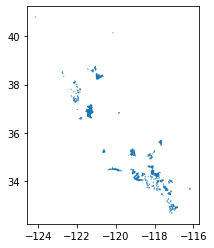

In [292]:
final_dbl.plot()

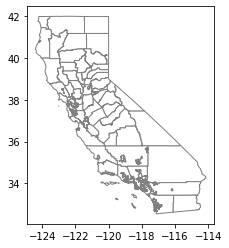

In [298]:
result = gpd.overlay(final, ca_shp,how='union')
result.plot(edgecolor='grey', facecolor='w')

In [186]:
# index_year = range(1980, 2021, 1)
# fig, axes = plt.subplots(nrows=2, ncols=3,figsize = (15,7))
# for i in range(2):
#     for j in range(3):
#         ax = axes[i,j]
#         final.plot(ax=ax, cmap='OrRd', scheme='quantiles', legend=True)
#         ax.set_title('Investment by Zip Code, 1980-2021'%str(index_year[i*3+j]))
#         ax.axis('off')
#         leg = ax.get_legend()
#         leg.set_bbox_to_anchor((0.8, 0.15, 0.16, 0.2))
# plt.tight_layout()

Insufficient number of unique diffs. Breaks are random.
Insufficient number of unique diffs. Breaks are random.
Insufficient number of unique diffs. Breaks are random.
Insufficient number of unique diffs. Breaks are random.


IndexError: ignored

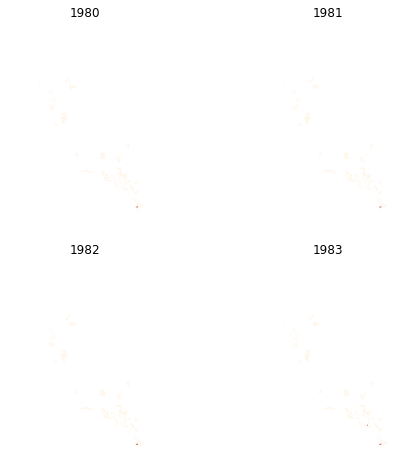

In [302]:
#%%capture
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(years):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    result.plot(
        column=col, 
        ax=ax,
        scheme= 'maximumbreaks', 
        linewidth=0,
        cmap='OrRd'
    )
    
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

**Classic Markov**

In [219]:
c = np.array([['b','a','c'],['c','c','a'],['c','b','c'],['a','a','b'],['a','b','c']])

In [220]:
m = giddy.markov.Markov(c)

The Markov Chain is irreducible and is composed by:
1 Recurrent class (indices):
[0 1 2]
0 Transient classes.
The Markov Chain has 0 absorbing states.


In [221]:
m.p

array([[0.25      , 0.5       , 0.25      ],
       [0.33333333, 0.        , 0.66666667],
       [0.33333333, 0.33333333, 0.33333333]])

In [231]:
final_ar = np.asarray(final)

In [237]:
invest = np.array([f.by_col[str(y)] for y in range(1980,2021)])

AttributeError: ignored

In [233]:
mits = [Moran(cs, w) for cs in pci]
res = np.array([(mi.I, mi.EI, mi.seI_norm, mi.sim[974]) for mi in mits

NameError: ignored

In [207]:
# Set seed for reproducibility
np.random.seed(123456)
# Calculate Moran's I for each variable
mi_results = [esda.moran.Moran(final, w_queen) for i in ca_cols]
# Structure results as a list of tuples
mi_results = [
    (year, res.I, res.p_sim) for year,res in zip(years, mi_results)
]
# Display on table
table = pd.DataFrame(
    mi_results,
    columns=['Year', "Moran's I", 'P-value']
).set_index('ZIP')
table
##SOURCE: https://geographicdata.science/book/notebooks/10_clustering_and_regionalization.html

TypeError: ignored

**